## Importation des bibliotheques

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import plotly.express as px
from azure.identity import DefaultAzureCredential
import seaborn as sns

## Recuperation des donnees

In [3]:
data = pd.read_csv("../data/Telco_customer_churn.csv")

## Entrainement de differents modeles

In [4]:
# Sélection des colonnes pertinentes pour l'entraînement
selected_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
                    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
                    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
                    'Monthly Charges', 'Total Charges']

# Filtrer les données avec les colonnes sélectionnées
data_selected = data[selected_columns + ['Churn Value']]

# Conversion des colonnes catégorielles en numériques
data_encoded = pd.get_dummies(data_selected, drop_first=True)

In [5]:

# Séparer les caractéristiques (features) et la cible (target)
X = data_encoded.drop('Churn Value', axis=1)
y = data_encoded['Churn Value']

In [6]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Liste des modèles à tester
models = {
    "Ada Boost": AdaBoostClassifier(n_estimators=100, algorithm="SAMME",),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [9]:
# Dictionnaires pour stocker les scores
accuracy_scores = {}
f1_scores = {}
roc_auc_scores = {}

# Entraîner et évaluer chaque modèle
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    f1_scores[model_name] = f1_score(y_test, y_pred)
    roc_auc_scores[model_name] = roc_auc_score(y_test, y_prob)

# Affichage des scores
print("Accuracy Scores:", accuracy_scores)
print("F1 Scores:", f1_scores)
print("ROC AUC Scores:", roc_auc_scores)

Accuracy Scores: {'Ada Boost': 0.7934705464868701, 'Random Forest': 0.7977288857345636, 'SVM': 0.7402413058907026, 'Gradient Boosting': 0.8048261178140526}
F1 Scores: {'Ada Boost': 0.5788712011577424, 'Random Forest': 0.5899280575539568, 'SVM': 0.61875, 'Gradient Boosting': 0.6054519368723099}
ROC AUC Scores: {'Ada Boost': 0.8561855797819623, 'Random Forest': 0.8442244796828543, 'SVM': 0.8016959861248761, 'Gradient Boosting': 0.8591811199207136}


## Visualisation des resultats

In [10]:
# Préparer les données pour la visualisation
scores_df = pd.DataFrame({
    'Model': list(accuracy_scores.keys()),
    'Precision': list(accuracy_scores.values()),
    'Score F1': list(f1_scores.values()),
    'ROC AUC': list(roc_auc_scores.values())
})

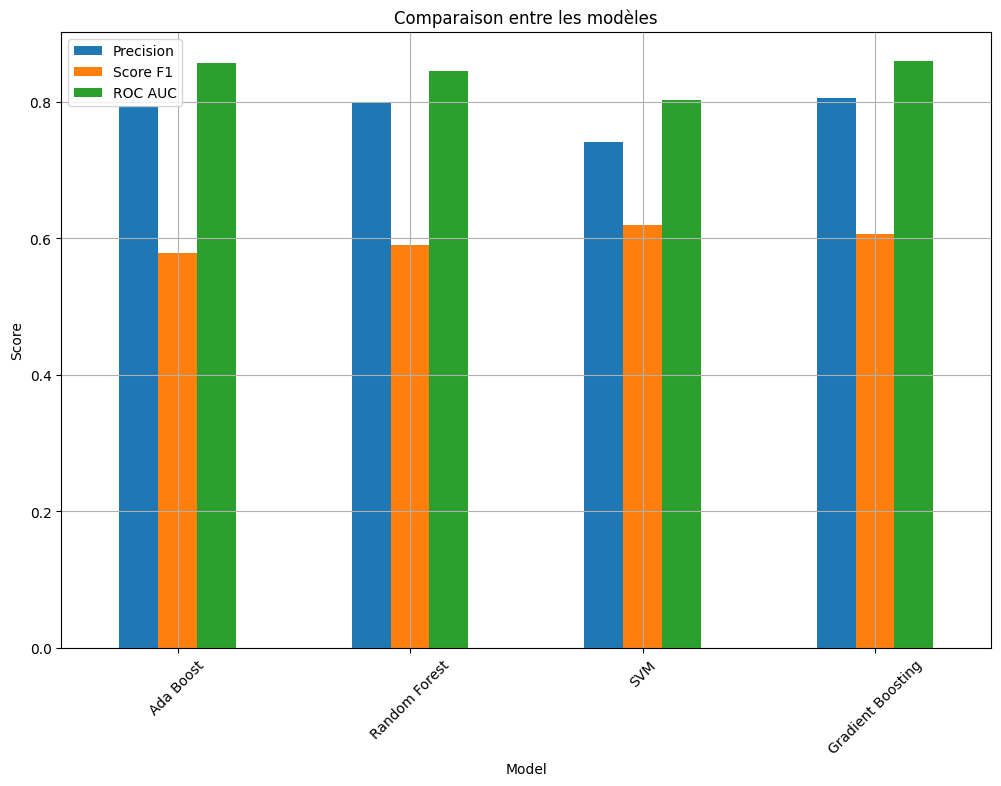

In [13]:
# Tracer les scores
scores_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Comparaison entre les modèles')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Choix du model base sur le score f1, Precision et ROC